<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
tesla_data.reset_index(inplace=True)

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
print(soup.prettify()[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

NameError: name 'tesla_revenue' is not defined

Execute the following lines to remove an null or empty strings in the Revenue column.


In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

NameError: name 'tesla_revenue' is not defined

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [12]:
table = soup.find("table")

# Extract table rows
rows = table.find_all("tr")

# Extract table headers and data
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])

# Create a DataFrame
import pandas as pd
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())

    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
# Import yfinance
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first few rows of the data
print(gme_data.head())


   index                      Date      Open      High       Low     Close  \
0      0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666   
1      1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250   
2      2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   
3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   
4      4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   

     Volume  Dividends  Stock Splits  
0  76216000        0.0           0.0  
1  11021600        0.0           0.0  
2   8389600        0.0           0.0  
3   7410400        0.0           0.0  
4   6892800        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
# Extract historical stock data for GameStop
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
# Reset the index of gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
import requests

# URL of the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data_2 = response.text

# Optionally, print the first 500 characters of the HTML data to check
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
from bs4 import BeautifulSoup

# Parse the html data using the 'html.parser' or 'html5lib' parser
soup = BeautifulSoup(html_data_2, 'html.parser')  # Alternatively, use 'html5lib'

# Optionally, print the parsed content
print(soup.prettify()[:500])  # Print the first 500 characters of the prettified HTML


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

# Extract the correct table (assuming it's the first one)
# Use pandas read_html method for easier handling of tables
gme_revenue = pd.read_html(str(tables[0]))[0]

# Clean the Revenue column by removing the dollar sign and commas
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned DataFrame
print(gme_revenue.head())


KeyError: 'Revenue'

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
print(gme_revenue.tail())

    GameStop Annual Revenue (Millions of US $)  \
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,806  
12                                       $7,094  
13                                       $5,319  
14                                       $3,092  
15                                       $1,843  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


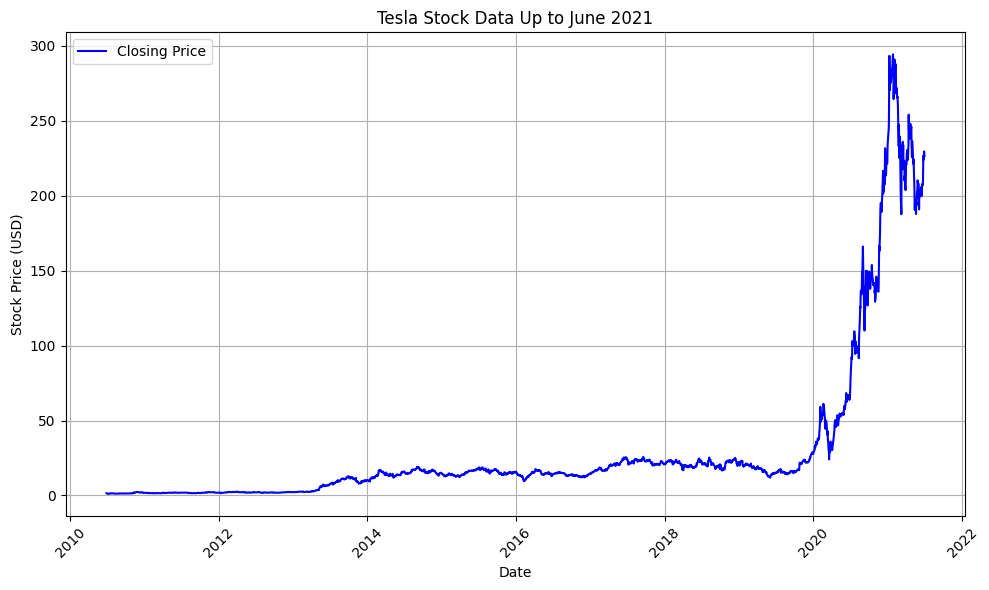

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'tesla_stock_data' with a 'Date' column
# Make sure the 'Date' column is in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Filter the data up to June 2021
tesla_stock_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Define the make_graph function to plot the data
def make_graph(data, title="Tesla Stock Data"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the make_graph function with the filtered data and title
make_graph(tesla_stock_data_filtered, title="Tesla Stock Data Up to June 2021")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data here
# gme_data = pd.read_csv('path_to_your_gme_data.csv')
# gme_revenue = pd.read_csv('path_to_your_gme_revenue.csv')

# Check the columns in gme_revenue to confirm the correct column name
print("gme_revenue columns:", gme_revenue.columns)

# Ensure 'Date' column in gme_data is in datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'], errors='coerce')

# Check if 'Date' column exists in gme_revenue
if 'Date' not in gme_revenue.columns:
    print("gme_revenue columns after check:", gme_revenue.columns)
    # Check for alternative date column
    if 'Date_Reported' in gme_revenue.columns:
        gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date_Reported'], errors='coerce')
    else:
        print("Date column not found in gme_revenue. Please inspect the data.")
        # You may need to manually inspect and handle it
        # gme_revenue['Date'] = pd.to_datetime(gme_revenue['Your_Column_Name'], errors='coerce')

# Ensure the revenue column exists
if 'Revenue' not in gme_revenue.columns:
    print("Revenue column not found in gme_revenue. Please inspect the data.")
else:
    # Filter data up to June 2021
    gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
    gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

    # Define the make_graph function to plot GameStop stock data and revenue data
    def make_graph(gme_data, gme_revenue, title="GameStop"):
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot GameStop stock data (e.g., 'Close' price)
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
        ax1.plot(gme_data['Date'], gme_data['Close'], label='Stock Price', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Create a second y-axis for revenue data
        ax2 = ax1.twinx()
        ax2.set_ylabel('Revenue (USD)', color='tab:green')
        ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], label='Revenue', color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')

        # Title and other formatting
        plt.title(f"{title} Stock and Revenue Data up to June 2021")
        fig.tight_layout()  # Ensure the labels do not overlap
        plt.xticks(rotation=45)
        plt.grid(True)

        # Show the plot
        plt.show()

    # Call the make_graph function with filtered data and title
    make_graph(gme_data_filtered, gme_revenue_filtered, title="GameStop")

gme_revenue columns: Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
gme_revenue columns after check: Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
Date column not found in gme_revenue. Please inspect the data.
Revenue column not found in gme_revenue. Please inspect the data.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
